In [1]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import load_img,img_to_array
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense , Flatten , Conv2D 
from keras.layers import  MaxPooling2D ,BatchNormalization , Dropout
from keras.utils import to_categorical
import tensorflow as tf

2023-06-08 18:59:33.316955: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 18:59:33.382585: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 18:59:33.384091: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 18:59:34.444508: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
size = (32,32,1)

In [3]:
x_train = os.listdir('/home/zkzk/Arabic Handwritten/train')
x_test = os.listdir('/home/zkzk/Arabic Handwritten/test')

In [4]:
imgView = 'id_label_9.png'

In [5]:
arabic_Alphabet = ['alef', 'beh', 'teh', 'theh', 'jeem', 'hah', 'khah', 'dal', 'thal',
                    'reh', 'zain', 'seen', 'sheen', 'sad', 'dad', 'tah', 'zah', 'ain',
                    'ghain', 'feh', 'qaf', 'kaf', 'lam', 'meem', 'noon', 'heh', 'waw', 'yeh']

In [6]:
arabic_Alphabet[int(imgView.split('label_')[1].split('.')[0])]
imgView.split('label_')

['id_', '9.png']

In [7]:
TrainLB = pd.read_csv('TrainLabel.csv')
TestLB = pd.read_csv('TestLabel.csv')

In [8]:
TrainLB.head()

,1
0,1
1,1
2,1
3,1
4,1


In [9]:
y_train= []
for filename in x_train:
    y_train.append(filename.split('label_')[1].split('.')[0])
print("Size of train",len(y_train))


Size of train 13440


In [10]:
y_test=[]
for name in x_test:
    y_test.append(name.split('label_')[-1].split('.')[0])
print("Size of test",len(y_test))

Size of test 3361


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train , y_train , test_size = .15 , random_state=4)

In [72]:
train = pd.DataFrame({
    'filename': x_train,
    'category': y_train
})
validation = pd.DataFrame({
    'filename': x_valid,
    'category': y_valid
})
test = pd.DataFrame({
    'filename': x_test,
    'category': y_test
})

In [79]:
for i in range(len(test)):
    if test['category'][i] == '':
        print(i)
test['filename'][

2394


In [84]:
def refrances(category):
    x = arabic_Alphabet[int(category)-1]
    return x
def drop_empty(df , col_name):
    df[col_name].replace('' , np.nan , inplace = True)
    df.dropna(subset = col_name , inplace = True)
drop_empty(train , 'category')
drop_empty(validation , 'category')
drop_empty(test , 'category')

In [85]:
train['category'] = train['category'].apply(refrances)
validation['category'] = validation['category'].apply(refrances)
test['category'] = test['category'].apply(refrances)

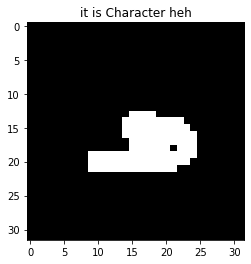

In [86]:
imgShow = load_img('./train/' + x_train[2])
plt.title('it is Character ' + refrances(y_train[2]))
plt.imshow(imgShow)

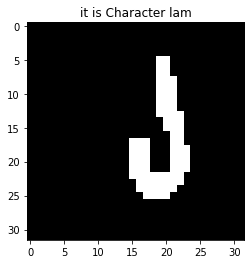

In [17]:
imgShow = load_img('./train/' + x_train[6])
plt.title('it is Character ' + refrances(y_train[6]))
plt.imshow(imgShow)

In [18]:

# install model
classifier = Sequential()

# 1- convolution
classifier.add(Conv2D(32,(3,3),input_shape = size , activation = 'relu'))
classifier.add(BatchNormalization())
# 2- pooling image
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2))

#3-  Adding a second convolutional layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.2)) #used for prevent overfitting model
#3-  Adding a third convolutional layer
classifier.add(Conv2D(64,(3,3), activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.25))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection and hidden layers
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dense(units = 32, activation = 'relu'))
classifier.add(BatchNormalization())
classifier.add(Dropout(0.5))
classifier.add(Dense(units = 28, activation = 'softmax'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy'
                   , metrics = ['accuracy'])
classifier.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 13, 13, 64)       2

In [19]:
batch = 64
train_datagen = ImageDataGenerator(rescale=1./255,shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_set = train_datagen.flow_from_dataframe( train , './train',
            x_col='filename',
            y_col='category',
            target_size=(32,32),
            color_mode="grayscale",
            class_mode='categorical',
            batch_size=batch
          )
valid_set = train_datagen.flow_from_dataframe(
    validation, './train',
            x_col='filename',
            y_col='category',
            target_size=(32,32),
            color_mode="grayscale",
            class_mode='categorical',
            batch_size=batch
)


Found 11424 validated image filenames belonging to 28 classes.
Found 2016 validated image filenames belonging to 28 classes.


In [20]:
from keras.callbacks import EarlyStopping
earlystop = EarlyStopping(patience=10)
len(valid_set)

32

In [21]:
classifier.fit(train_set,
          steps_per_epoch = int(len(train_set)),
          epochs = int(100),
          validation_data = valid_set,
          validation_steps=int(len(valid_set))
              )


Epoch 1/100


2023-06-08 18:59:38.112115: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


179/179 [==============================] - ETA: 0s - loss: 3.4160 - accuracy: 0.0985

2023-06-08 18:59:58.816801: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


179/179 [==============================] - 22s 109ms/step - loss: 3.4160 - accuracy: 0.0985 - val_loss: 4.6393 - val_accuracy: 0.0451
Epoch 2/100
179/179 [==============================] - 19s 104ms/step - loss: 2.6966 - accuracy: 0.2026 - val_loss: 4.0455 - val_accuracy: 0.0610
Epoch 3/100
179/179 [==============================] - 19s 107ms/step - loss: 2.3030 - accuracy: 0.2966 - val_loss: 2.5837 - val_accuracy: 0.2312
Epoch 4/100
179/179 [==============================] - 18s 102ms/step - loss: 2.0207 - accuracy: 0.3701 - val_loss: 1.6063 - val_accuracy: 0.5382
Epoch 5/100
179/179 [==============================] - 18s 102ms/step - loss: 1.7795 - accuracy: 0.4474 - val_loss: 1.3734 - val_accuracy: 0.5863
Epoch 6/100
179/179 [==============================] - 19s 104ms/step - loss: 1.5970 - accuracy: 0.4953 - val_loss: 1.1285 - val_accuracy: 0.6627
Epoch 7/100
179/179 [==============================] - 19s 104ms/step - loss: 1.4499 - accuracy: 0.5382 - val_loss: 1.0238 - val_accurac

In [22]:
test_set = test_datagen.flow_from_dataframe(
    test, 
    "./test", 
    x_col='filename',
    y_col='category',
    target_size=(32,32),
    color_mode="grayscale",
    class_mode='categorical',
    batch_size=10
)
score=classifier.evaluate(test_set)
print('\n', 'Test accuracy:', score[1]*100)

Found 3360 validated image filenames belonging to 28 classes.
 12/336 [>.............................] - ETA: 4s - loss: 0.1430 - accuracy: 0.9333

2023-06-08 19:40:04.121324: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


336/336 [==============================] - 4s 12ms/step - loss: 0.2073 - accuracy: 0.9375

 Test accuracy: 93.75


In [31]:
label_map = dict((v,k) for k,v in train_set.class_indices.items())

In [36]:
sample = np.random.choice(x_test)
test_img = load_img(('./test/' + sample ), color_mode='grayscale')
img=img_to_array(test_img).reshape(-1,32,32,1)
predict=classifier.predict(img)
predict=np.argmax(predict,axis = 1)

1/1 [==============================] - 0s 26ms/step


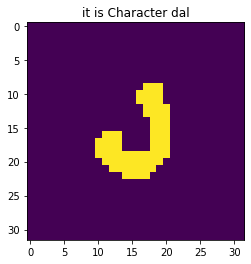

In [37]:
# imgShow = load_img('./train/' + x_train[6])
plt.title('it is Character ' + refrances(predict[0]))
plt.imshow(test_img)

In [39]:
test_set = test_datagen.flow_from_dataframe(
    test, 
    "./test", 
    x_col='filename',
    target_size=(32,32),
    color_mode="grayscale",
    class_mode=None,
    shuffle=False
)

Found 3360 validated image filenames.


In [58]:
predict=classifier.predict(test_set)
predict=np.argmax(predict,axis = 1)

  8/105 [=>............................] - ETA: 1s

2023-06-08 20:13:32.876904: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


105/105 [==============================] - 2s 19ms/step


In [59]:
len(y_test)
# print(refrances(predict[1]))

3361

In [90]:
y_p=[]
for i in range(len(y_test)):
    y_p.append(label_map[predict[i-1]])
for i in range(len(y_p)):
    if i == 2394: #we drop axise num i  becouse the has an empty category in test
        y_p.remove(y_p[i])
print(len(y_p))

3360


In [91]:
test['category']

0        dad
1        beh
2        lam
3       theh
4       zain
        ... 
3356     lam
3357     feh
3358     sad
3359     reh
3360     hah
Name: category, Length: 3360, dtype: object

In [92]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_p,test['category'])
cm

array([[108,   1,   0,   0,   1,   0,   4,   3,   0,   0,   0,   0,   1,
          1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,   0,
          0,   0],
       [  0, 117,   0,   0,   0,   0,   0,   0,   0,   0,   1,   0,   0,
          2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0, 117,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0],
       [  0,   0,   1, 112,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   1,   0,   0,   3,   0,   0,   1,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 109,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   2,   0,   2,   0,
          0,   0],
       [  0,   0,   0,   2,   0, 110,   1,   0,   1,   0,   0,   0,   0,
          0,   1,   6,   0,   0,   1,   0,   0,   1,   1,   0,   0,   2,
          0,   0],
       [  

In [93]:
accuracy = sum(cm[i][i] for i in range(28)) / len(y_test)
print("accuracy = " + str(accuracy))

accuracy = 0.9306753942279083


In [96]:
classifier.save('arabic_character_prediction')

2023-06-08 21:16:47.809265: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,15,15,32]
	 [[{{node inputs}}]]
2023-06-08 21:16:47.831290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,6,6,64]
	 [[{{node inputs}}]]
2023-06-08 21:16:47.852458: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'inputs' with dtype float and shape [?,2,2,64]
	 [[{{node inputs}}]]
2023-

INFO:tensorflow:Assets written to: arabic_character_prediction/assets


INFO:tensorflow:Assets written to: arabic_character_prediction/assets
